In [29]:
#Our first demo is adapted from https://datasittersclub.github.io/site/dsc10.html
# But be warned, it switches to R - we will be using Python throughout!
# #NLTK is the NLP package we're using
import nltk
nltk.download('averaged_perceptron_tagger')
#OS is for navigating directories on the computer
import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\an111789\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
textdir = 'C:\\DesignDevSyllabus\\exercises\eleven\\text\\'
os.chdir(textdir)

In [31]:
#For each filename in the directory you listed...
for filename in os.listdir(textdir):
    #If the filename ends with .txt...
    if filename.endswith('.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-nouns.txt')
        #Open the file
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        #if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        #if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

In [32]:
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-nouns.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()
        start_idx, end_idx, segm_cnt = 0, max_length, 1

        # extract slices from the text:
        while end_idx < len(lemmas):
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-nouns.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles
    

In [37]:
documents, titles = load_directory(textdir, 10000)
import sklearn.feature_extraction.text as text
print(titles[0])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

wof01_the_dragonet_prophecy-1
(10, 30)
['anything', 'cave', 'claws', 'd', 'dragon', 'dragonet', 'dragonets', 'dragons', 'eyes', 'face']


[Text(0.5, 0, 'cave'), Text(0, 0.5, 'dragon')]

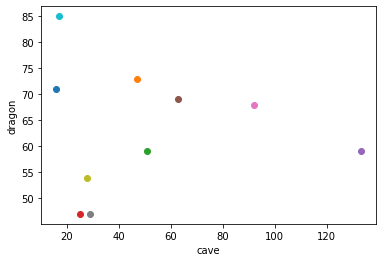

In [41]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('cave')]
y = v_documents[:, words.index('claws')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='cave', ylabel='dragon')
# plt.legend();


In [42]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(10, 30)
(10, 2)


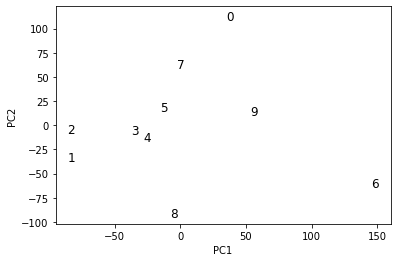

In [47]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title[4], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');